<a href="https://colab.research.google.com/github/shirley-yp/projects_2024/blob/main/6_Supervised_MLs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inspiration: 365 Data Science: https://www.udemy.com/course/the-supervised-machine-learning-course

#### $\color{blue}{\text{ML 1: Multinomial Naive Bayes Classifier}}$
#### $\color{green}{\text{ML 2: K-Nearest Neighbors}}$
#### $\color{purple}{\text{ML 3: Decision Trees and Random Forest}}$
#### $\color{orange}{\text{ML 4: Support Vector Machines}}$
#### $\color{red}{\text{ML 5: Ridge and Lasso Regression}}$

## $\color{Blue}{\text{Multinomial Naive Bayes Classifier - the YouTube Dataset}}$

#### $\color{blue}{\text{Part 1: Import libraries and data}}$

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Youtube01.csv to Youtube01.csv
Saving Youtube02.csv to Youtube02.csv
Saving Youtube03.csv to Youtube03.csv
Saving Youtube04.csv to Youtube04.csv
Saving Youtube05.csv to Youtube05.csv


In [ ]:
df={filename: pd.read_csv(filename).drop(['COMMENT_ID', 'AUTHOR', 'DATE'],axis=1) for filename in uploaded.keys()}

In [ ]:
data=pd.concat(df.values(),ignore_index=True)

In [ ]:
data.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1


In [ ]:
data.isnull().sum()

,0
CONTENT,0
CLASS,0


In [ ]:
data['CLASS'].value_counts()

,count
CLASS,
1,1004
0,951


#### $\color{blue}{\text{Part 2: Define the inputs and target. Create train-test split.}}$

In [ ]:
inputs=data['CONTENT']
target= data['CLASS']

x_train, x_test, y_train, y_test=train_test_split(inputs, target,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=target) # equal portion to training

In [ ]:
y_train.value_counts(), y_test.value_counts()
# y_test.value_counts(normalize=True) # ratio # due to stratify=target

(CLASS
 1    803
 0    761
 Name: count, dtype: int64,
 CLASS
 1    201
 0    190
 Name: count, dtype: int64)

#### $\color{blue}{\text{Part 3: Vectorization}}$

In [ ]:
vectorizer=CountVectorizer()
x_train_transf=vectorizer.fit_transform(x_train) # after train_test_split to avoid overfitting
x_test_transf = vectorizer.transform(x_test)

In [ ]:
x_train_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_train_transf.shape

(1564, 3905)

In [ ]:
x_test_transf.shape

(391, 3905)

#### $\color{blue}{\text{Part 4: Perform classification}}$

In [ ]:
# Naive Bayes classifier:
# Gaussian -  the likelihood is assumed to be Gaussian, most suitable when features are continuous
# Bernoulli - assume all features are binary valued.
# Categorical - assume each category has its own categorical distribution.
# Multinomial - suitable for text classification.
# Complement - suitable for text classification. more adept handling IMBALANCED data.

# clf=MultinomialNB()
clf=MultinomialNB(class_prior=np.array([0.6,0.4]))
# clf=ComplementNB() # better perform than MultinomialNB here

In [ ]:
clf.fit(x_train_transf, y_train)

MultinomialNB(class_prior=array([0.6, 0.4]))

In [ ]:
np.exp(clf.class_log_prior_)

array([0.6, 0.4])

In [ ]:
clf.get_params()

{'alpha': 1.0,
 'class_prior': array([0.6, 0.4]),
 'fit_prior': True,
 'force_alpha': True}

#### $\color{blue}{\text{Part 5: Evaluate on test dataset}}$

In [ ]:
y_test_pred=clf.predict(x_test_transf)

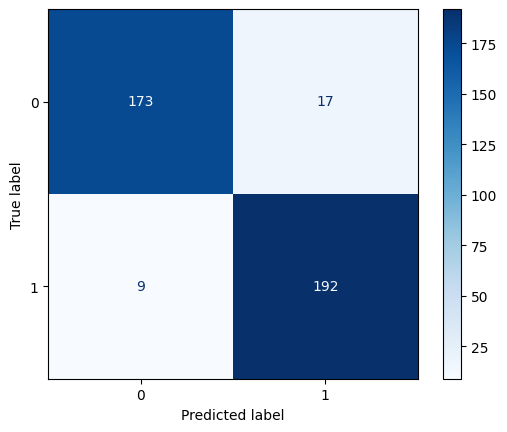

In [ ]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels=clf.classes_,
    cmap='Blues'
);

In [ ]:
print(classification_report(y_test, y_test_pred, target_names=['Ham','Spam']))

              precision    recall  f1-score   support

         Ham       0.95      0.88      0.92       190
        Spam       0.90      0.96      0.93       201

    accuracy                           0.92       391
   macro avg       0.93      0.92      0.92       391
weighted avg       0.93      0.92      0.92       391



#### $\color{blue}{\text{Part 6: Make predictions}}$

In [ ]:
predict_data=vectorizer.transform(["this song is amaing!","you can win 1m dollars right now!"])

In [ ]:
clf.predict(predict_data)

array([0, 1])

## $\color{Green}{\text{KNN(K-Nearest Neighbors) - the Random Dataset}}$

#### $\color{Green}{\text{Part 1: Import libraries
}}$

In [ ]:
from sklearn.datasets import make_blobs

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,ConfusionMatrixDisplay, accuracy_score

from sklearn.model_selection import GridSearchCV

from mlxtend.plotting import plot_decision_regions

import time

import numpy as np

#### $\color{Green}{\text{Part 2: Generate data}}$

In [ ]:
inputs, target=make_blobs(n_samples=1000,
                         centers=[(-3,3),(0,0),(2,2)],
                         random_state=40)

In [ ]:
inputs.shape, target.shape

((1000, 2), (1000,))

In [ ]:
data=pd.DataFrame(data=inputs, columns=['Feature 1','Feature 2'])
data['Target']=target
data.head()

,Feature 1,Feature 2,Target
0,-3.092273,3.870726,0
1,-2.762572,2.608186,0
2,-4.302618,2.833174,0
3,0.901973,2.216005,2
4,0.970112,0.684213,1


#### $\color{Green}{\text{Part 3: Visualize data and data distribution}}$

In [ ]:
knn_palette=sns.color_palette(['#000C1F', '#29757A', '#FF5050'])
knn_palette

[(0.0, 0.047058823529411764, 0.12156862745098039),
 (0.1607843137254902, 0.4588235294117647, 0.47843137254901963),
 (1.0, 0.3137254901960784, 0.3137254901960784)]

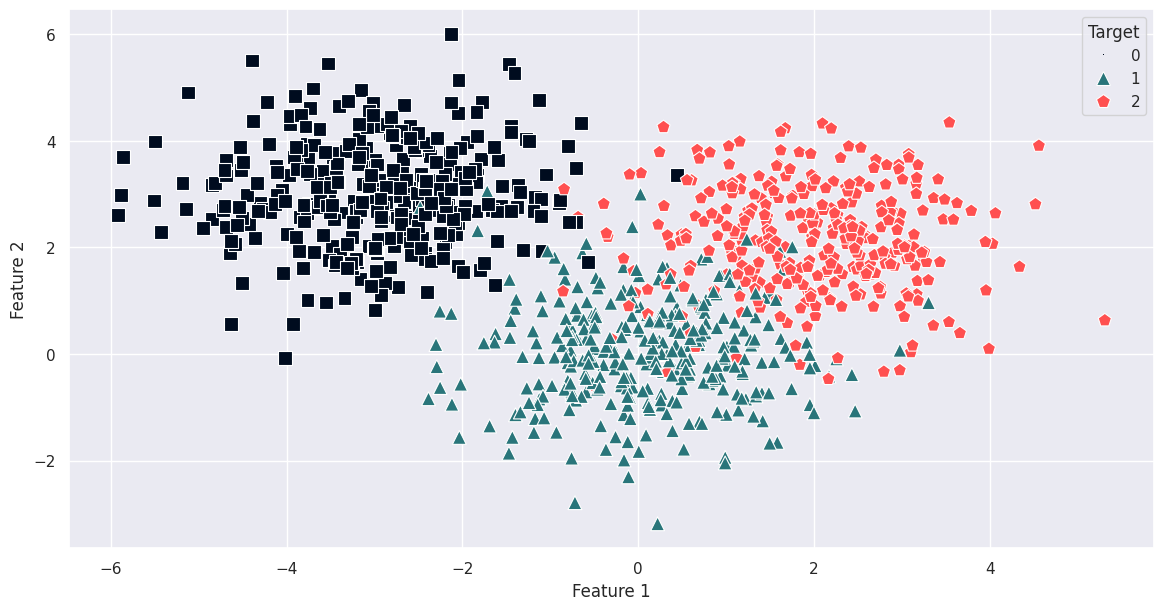

In [ ]:
plt.figure(figsize=(14,7))
sns.scatterplot(x='Feature 1',y='Feature 2',
              data=data,
              hue='Target',
              palette=knn_palette,
              markers=[',','^','p'],
              style='Target',
              s=100);

<Figure size 1600x900 with 0 Axes>

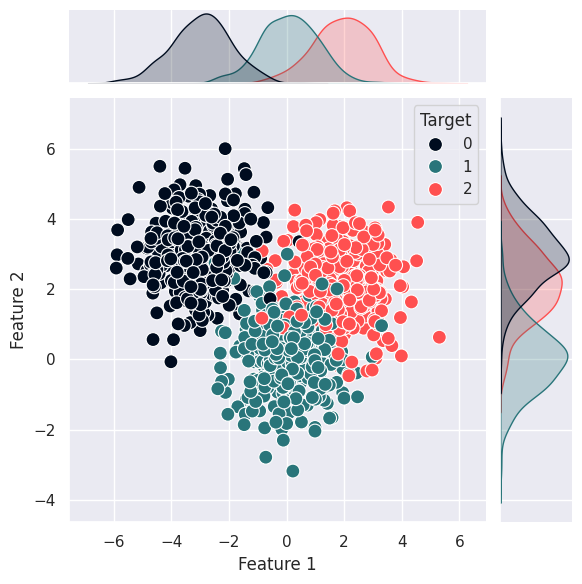

In [ ]:
plt.figure(figsize=(16,9))
sns.jointplot(x='Feature 1',y='Feature 2',
              data=data,
              hue='Target',
              palette=knn_palette,
              markers=[',','^','p'],
              s=100);

#### $\color{Green}{\text{Part 4: Classification}}$

In [ ]:
# Create a train-test-split
x_train, x_test, y_train, y_test=train_test_split(inputs, target,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=target) # what stratify mean?

In [ ]:
# create the model - weights is to define the tie breaker
# here weights ='uniform' by default
# clf=KNeighborsClassifier(n_neighbors=2)


# create the model option 2 - here weights ='distance' (it will be calculated as 1/distance)
# clf=KNeighborsClassifier(n_neighbors=2, weights='distance')

# In Part 6: decision region
# k-value=1
# clf=KNeighborsClassifier(n_neighbors=1, weights='uniform')
# k-value=30
clf=KNeighborsClassifier(n_neighbors=30, weights='uniform')


clf.fit(x_train, y_train) # fitting process stores the coordinates

KNeighborsClassifier(n_neighbors=30)

In [ ]:
# Predict a sample - point o
feature_1=-0.18
feature_2=3.2

In [ ]:
# Logic: here we trained data, have coordinates of point o, and 1 neighbor --> we can predict the class of point o
# In other words: give the algorithm a single set of coordinates--determine the class based on its neighbors
clf.predict([[feature_1, feature_2]]) # can pas more coordinates if needed

array([2])

In [ ]:
neighbors=clf.kneighbors([[feature_1, feature_2]])
neighbors
# first array is the Euclidean distance to its nearest neighbor
# 2nd array is the index of the neighbor in the training dataset

(array([[0.18818631, 0.28539916, 0.28691689, 0.43703393, 0.60139645,
         0.63173468, 0.63726969, 0.67259026, 0.72462428, 0.73682809,
         0.77958738, 0.78835129, 0.80863184, 0.8104168 , 0.87172925,
         0.89422794, 0.93531618, 0.93942992, 0.94694626, 0.95254748,
         0.96855853, 0.99218253, 1.00103063, 1.01545583, 1.03211756,
         1.05755447, 1.1035631 , 1.13890868, 1.15317865, 1.15682441]]),
 array([[606, 741,  19, 251,  90,  51, 566, 622, 676, 152, 586, 721, 276,
          69, 637, 621, 608,  83, 378, 658,   0, 609, 401, 213,  48, 208,
         543, 607, 722, 797]]))

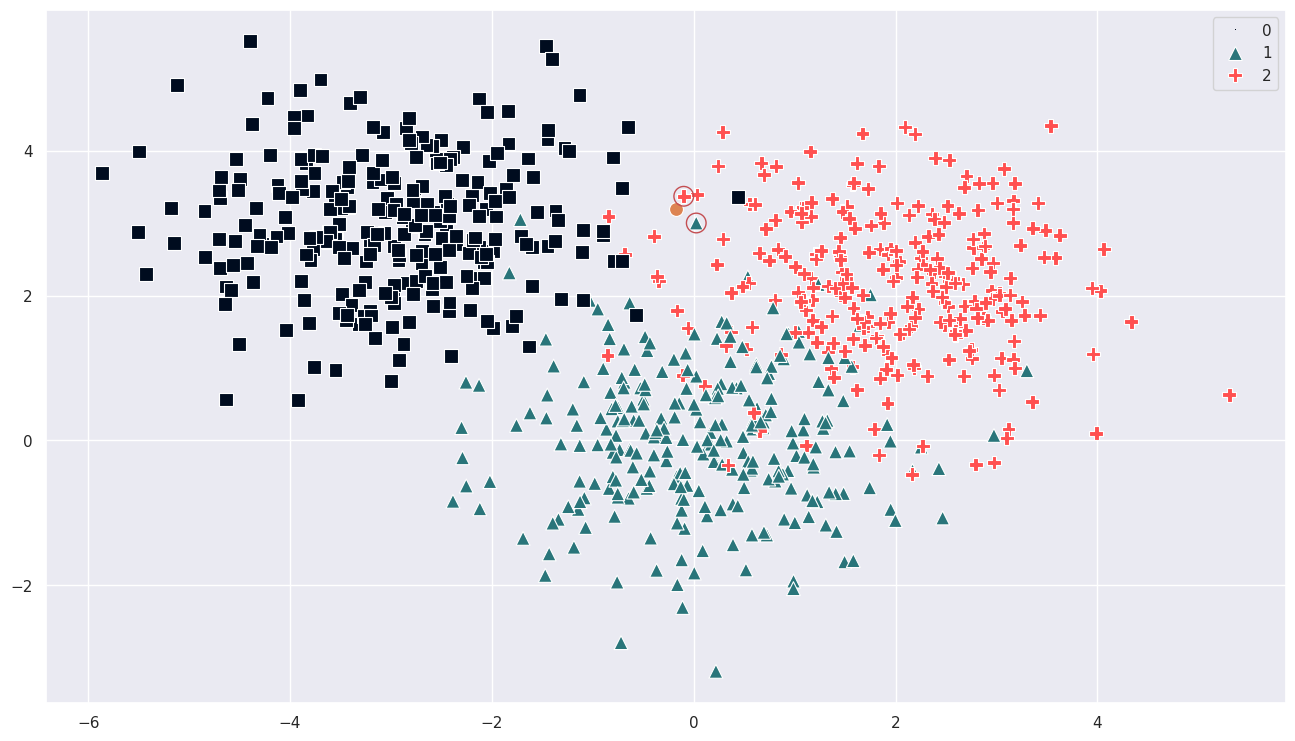

In [ ]:
# Visualize the neighbors

# Logic: create a scatter plot of the training data
# Put point o on the coordinates
# Draw a circle around the nearest neighbor
# note: we won't plot the test dataset as classifier doesn't know it yet

plt.figure(figsize=(16,9))

sns.scatterplot(x=x_train[:,0],y=x_train[:,1],
                hue=y_train,
                palette=knn_palette,
                markers = [',', '^', 'P'],
                style = y_train,
                s=100);

sns.scatterplot(x=[feature_1],y=[feature_2],
                # style=[feature_2],
                markers=['o'],
                s=100);

plot_x_train=[]
plot_y_train=[]

for i in neighbors[1]:
  plot_x_train.append(x_train[i,0])
  plot_y_train.append(x_train[i,1])

plt.scatter(plot_x_train,
             plot_y_train,
             s=200,facecolors='none',edgecolors='r');


#### $\color{Green}{\text{Part 5: How to break a tie}}$

In [ ]:

# Get parameters of the model - model default 'uniform' vs self define 'distance'
clf.get_params()
# here 'weights' is 'uniform'(default)- it means knn should be equally likely to classify point o both as a plus and a triangle.
# so when there is a tie, there is no preference for the model to choose one over the other.
#  when point o has 2 neighbors(which are class 1,2) --the point o is assigned to a class with smaller INDEX (here assigned to class 1).
# We can change the rule: to based on distance, instead of indexing.
# Note: sometimes 'uniform' performs better than 'distance'.

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'distance'}

#### $\color{Green}{\text{Part 6: Decision regions}}$

In [ ]:
# How diff k-value affect the results (still for given point o)? (small k-value vs. large k-value)
# Let's construct decision regions

x_train.shape

(800, 2)

TIme eslapse: 97.2 seconds


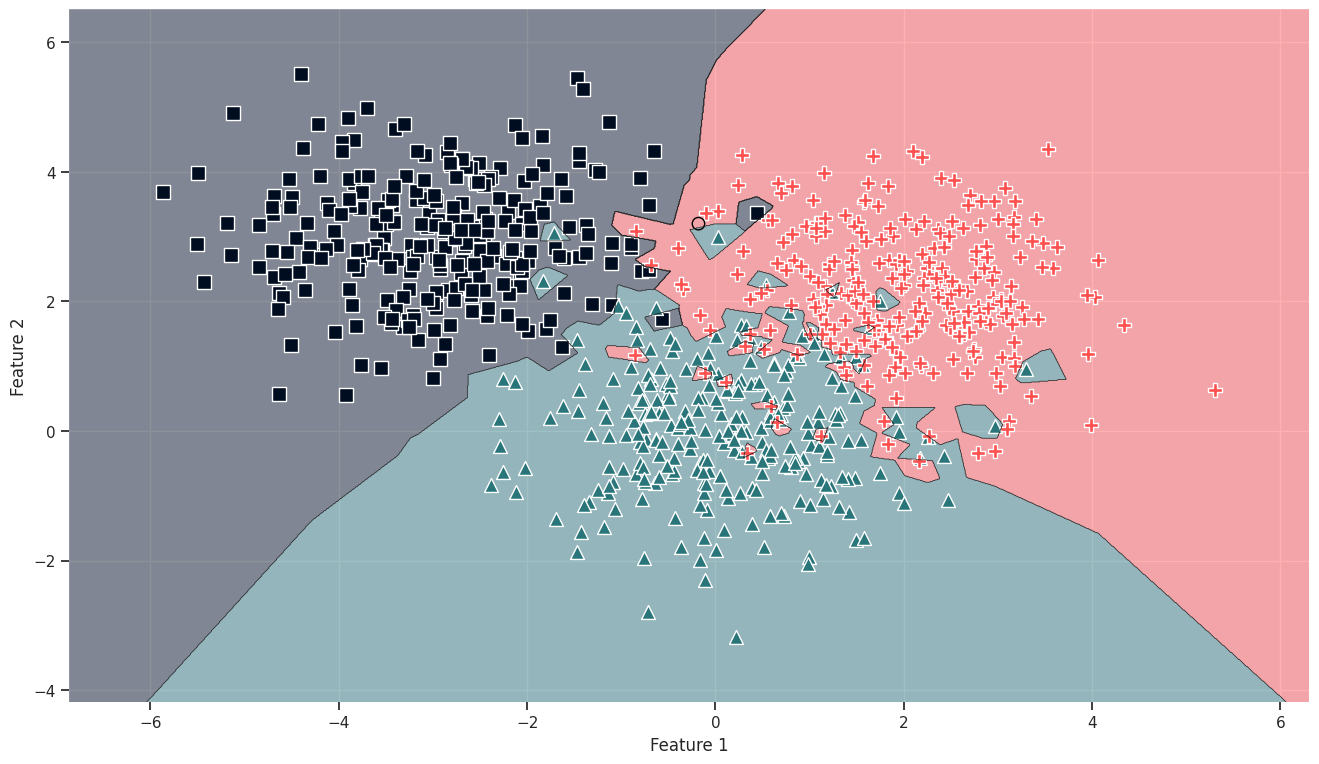

In [ ]:
# Visual when n_neighbors=1

# k-value=1
# rarely a good choice, sensitive to changes in the training data, likely to overfit, may poor performance on new data
# Low bias, high variance
# clf=KNeighborsClassifier(n_neighbors=1, weights='uniform')

start=time.time()

plt.figure(figsize=(16,9))

plot_decision_regions(X=x_train, y=y_train,
                      X_highlight=np.array([[feature_1, feature_2]]),
                      clf = clf,
                      markers = [',', '^', 'P'],
                      colors = '#000c1f,#29757a,#ff5050',
                      scatter_kwargs = {'s':100, 'edgecolor':'white', 'alpha':1},
                      legend = 0)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

end=time.time()

print(f'TIme eslapse: {round(end-start,1)} seconds')

TIme eslapse: 17.5 seconds


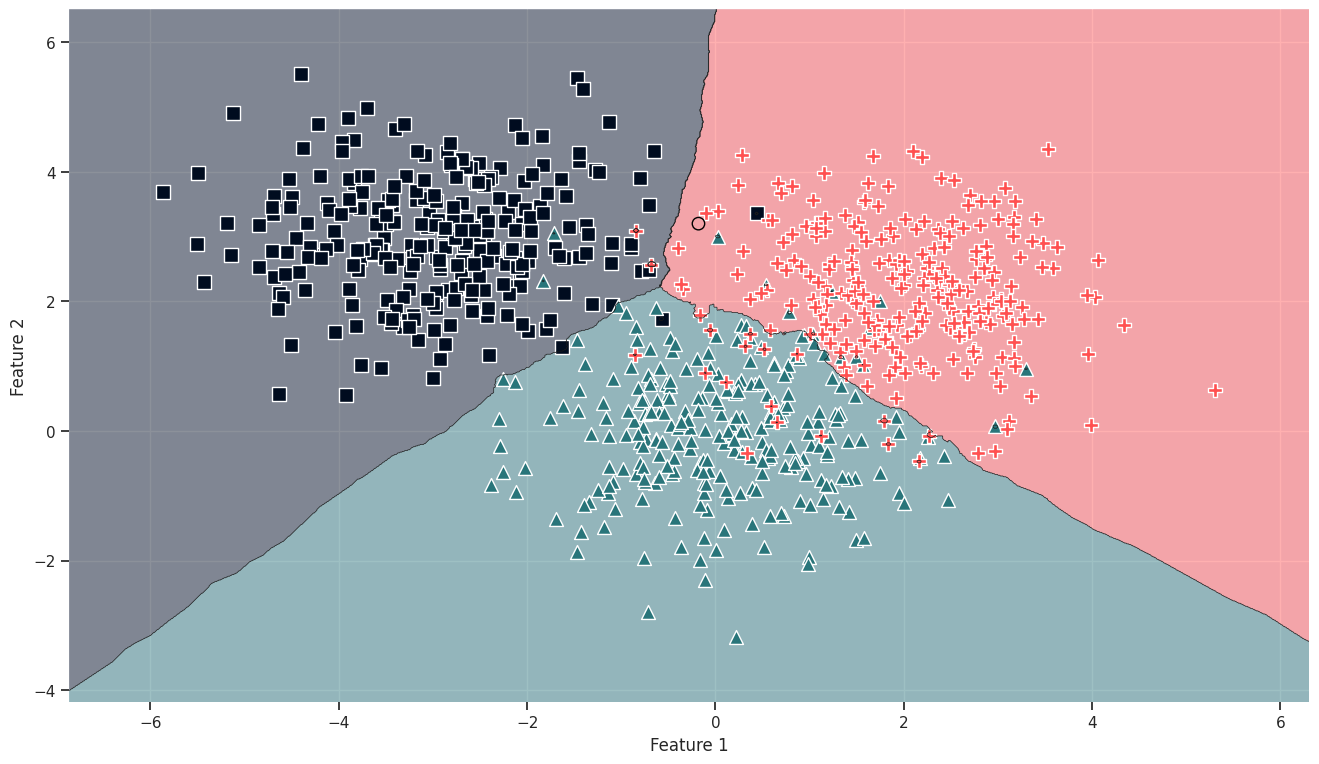

In [ ]:
# Visual when n_neighbors=30

# k-value=30
# smoother decision boundaries, model not affected by background noise, not affected by new data points
# tendency to misclassify points (low variance, high bias)
# clf=KNeighborsClassifier(n_neighbors=30, weights='uniform')

start=time.time()

plt.figure(figsize=(16,9))

plot_decision_regions(X=x_train, y=y_train,
                      X_highlight=np.array([[feature_1, feature_2]]),
                      clf = clf,
                      markers = [',', '^', 'P'],
                      colors = '#000c1f,#29757a,#ff5050',
                      scatter_kwargs = {'s':100, 'edgecolor':'white', 'alpha':1},
                      legend = 0)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

end=time.time()

print(f'TIme eslapse: {round(end-start,1)} seconds')

#### $\color{Green}{\text{Part 7: Choose the best K-value}}$

In [ ]:
# Given the results from part 6: k-value=1 (overfitting risk) vs. k-value=30 (under fitting risk)
# What is the sweet spot then?

# Get error rates of a set of models

error_uniform=[]
error_distance=[]

k_range=range(1,51)

for k in k_range:
  clf=KNeighborsClassifier(n_neighbors=k, weights='uniform')
  clf.fit(x_train, y_train)
  prediction=clf.predict(x_test)
  error_uniform.append(1-accuracy_score(y_test, prediction))

  clf=KNeighborsClassifier(n_neighbors=k, weights='distance')
  clf.fit(x_train, y_train)
  prediction=clf.predict(x_test)
  error_distance.append(1-accuracy_score(y_test, prediction))

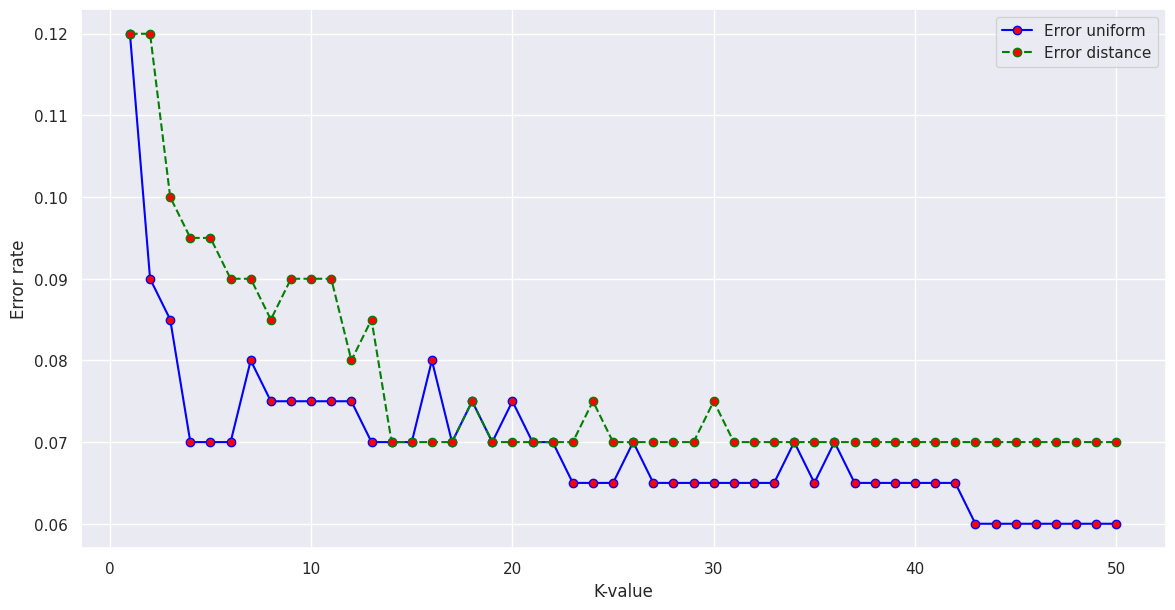

In [ ]:
# Plot the error rates(per uniform, distance) based on number of neighbors

plt.figure(figsize=(14,7))

plt.plot(k_range, error_uniform, c='blue',linestyle='solid',
         marker='o',markerfacecolor='red', label='Error uniform');

plt.plot(k_range, error_distance, c='green',linestyle='dashed',
         marker='o',markerfacecolor='red', label='Error distance');

plt.legend()

plt.xlabel('K-value')
plt.ylabel('Error rate');

# K-value: avoid small value (high variance), avoid big value (high bias), also with small error rate
# Per chart below, "error uniform" performs better than "error distance".

#### $\color{Green}{\text{Part 8: Grid Search}}$

In [ ]:
# Then what's the best neighbors to choose? - Grid Search to test and decide

# Choose parameters
parameters={'n_neighbors':range(1,51),
            'weights':['uniform','distance']}

# create an instance of the GridSearchCV class
grid_search=GridSearchCV(estimator=KNeighborsClassifier(),
                         param_grid=parameters,
                         scoring='accuracy')

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'n_neighbors': 29, 'weights': 'uniform'}

In [ ]:
clf=grid_search.best_estimator_

In [ ]:
clf

KNeighborsClassifier(n_neighbors=29)

In [ ]:
grid_search.best_score_

0.9462499999999998

#### $\color{Green}{\text{Part 9: Model performance}}$

In [ ]:
# Make predictions on the test dataset

y_test_pred=clf.predict(x_test)
y_test_pred.shape

(200,)

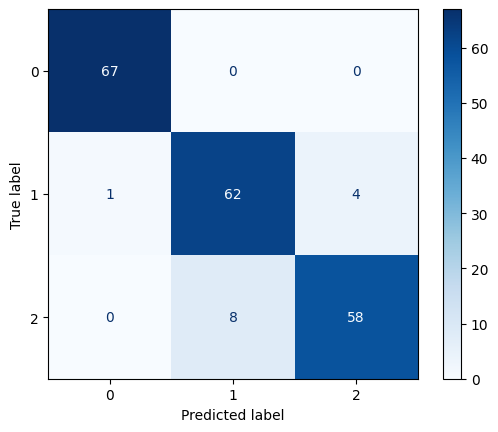

In [ ]:
# Construct the confusion matrix

sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels=clf.classes_,
    cmap='Blues'
);

In [ ]:
# Print out the classification report
print(classification_report(y_test, y_test_pred,target_names=['0','1','2']))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        67
           1       0.89      0.93      0.91        67
           2       0.94      0.88      0.91        66

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



# $\color{purple}{\text{Decision Trees and Random Forest}}$
###### $\color{purple}{\text{Part ONE: Decision Tree -Iris dataset}}$
###### $\color{purple}{\text{Part TWO: Random Forest - Glass data}}$
###### $\color{purple}{\text{Part THREE: Decision Tree & Random Forest - Census Income Dataset}}$


### $\color{purple}{\text{Part ONE: Decision Tree -Iris dataset}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

#### $\color{purple}{\text{Part 1: Dataset}}$

In [2]:
iris = load_iris()
X, y=iris.data, iris.target

In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
np.shape(X)

(150, 4)

#### $\color{purple}{\text{Part 2: Create decision tree}}$

In [8]:
clf=DecisionTreeClassifier()

In [9]:
clf=clf.fit(X,y)

In [10]:
clf.predict([[6.1,2.7,3.9,1.2]])

array([1])

#### $\color{purple}{\text{Part 3: Visualize the tree }}$

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 

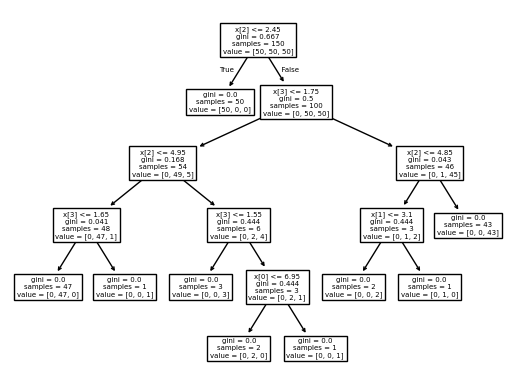

In [12]:
plot_tree(clf) # default visual

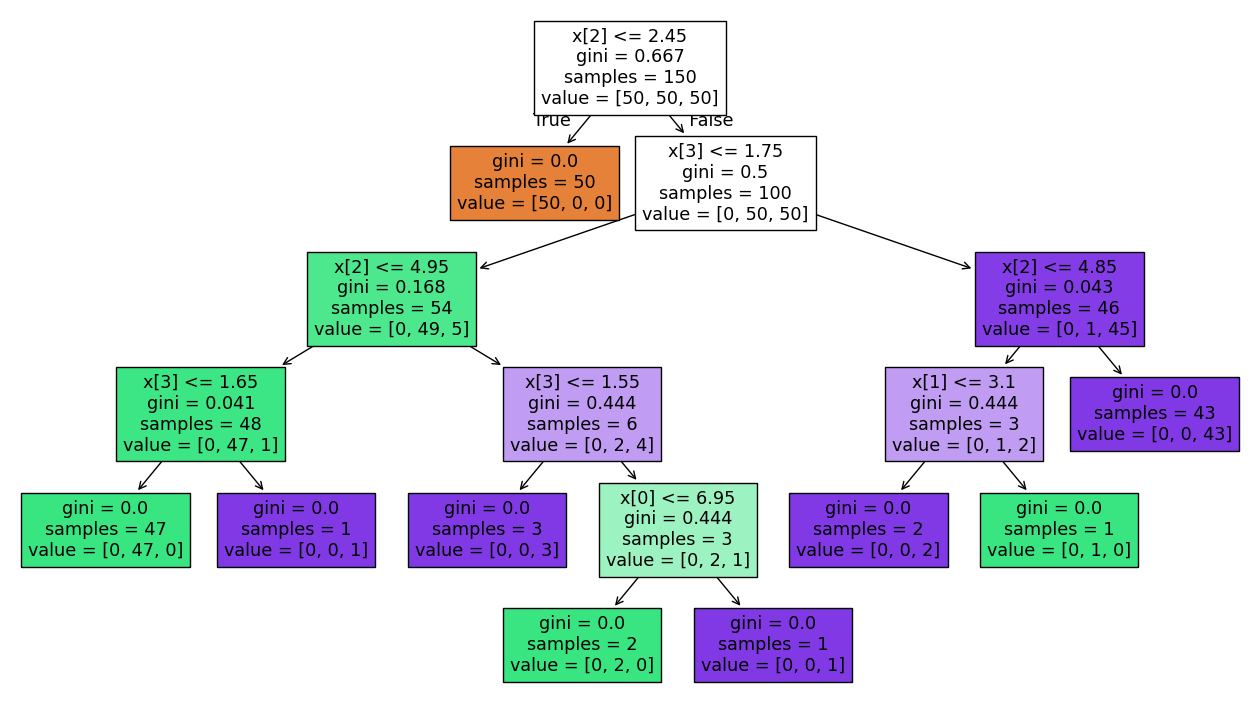

In [15]:
# For better visual
plt.figure(figsize=(16,9))
plot_tree(clf, filled=True);

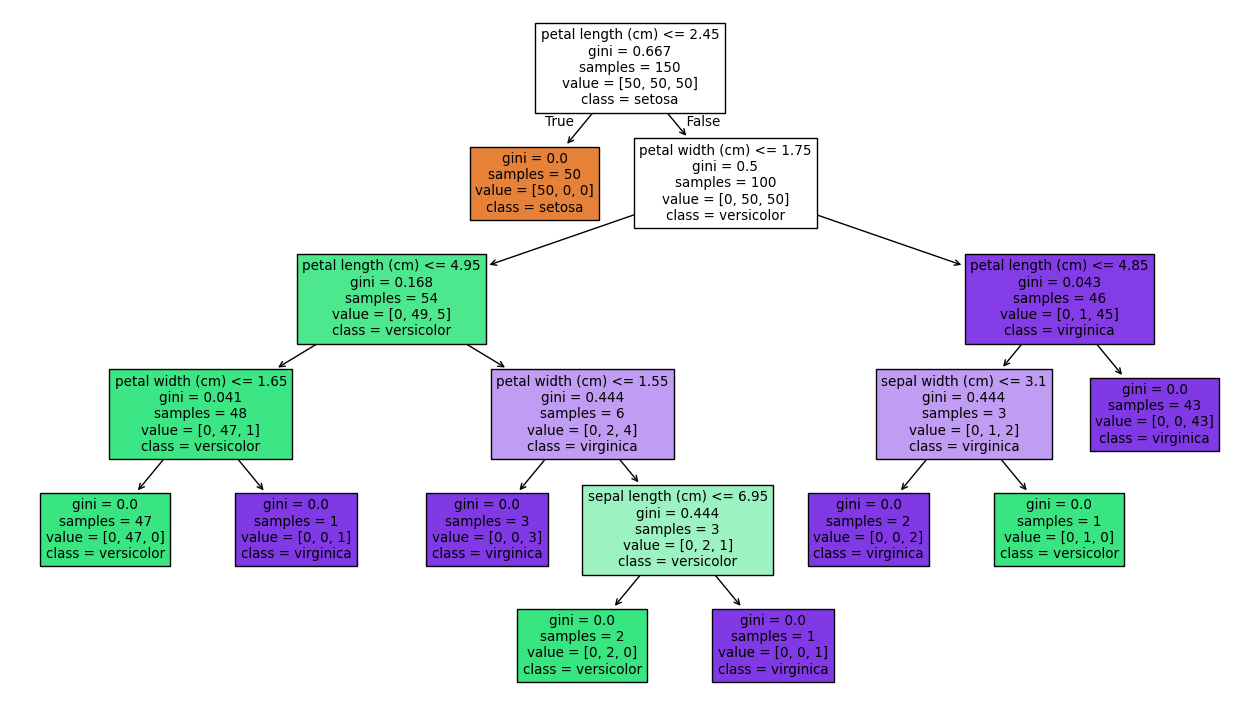

In [14]:
# For better visual
plt.figure(figsize=(16,9))
plot_tree(clf,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True);

### $\color{purple}{\text{Part TWO: Random Forest - Glass data }}$

In [42]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [20]:
from google.colab import files
uploaded = files.upload()

Saving glass_data.csv to glass_data (1).csv


In [21]:
data=pd.read_csv('glass_data.csv')

#### $\color{purple}{\text{Part 1: Dataset - Glass Dataset}}$

In [30]:
data.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [23]:
len(data)

214

In [24]:
data=data.drop(['Id'],axis=1)

In [25]:
inputs =data.iloc[:,:-1]
target=data.iloc[:,-1]

In [28]:
inputs.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0


In [29]:
target.head(2)

,Type
0,1
1,1


In [32]:
train_input, test_input, train_target, test_target=train_test_split(inputs, target, test_size=0.2, random_state=42)

#### $\color{purple}{\text{Part 2: Create and train the random forest}}$

In [34]:
clf=RandomForestClassifier(random_state=42)

In [35]:
clf.fit(train_input, train_target)

RandomForestClassifier(random_state=42)

In [39]:
clf.predict([train_input.iloc[125]]) # predict a class of a datapoint

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5])

#### $\color{purple}{\text{Part 3: Test the performance of our model}}$

In [40]:
test_pred=clf.predict(test_input)

In [43]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43



### $\color{purple}{\text{Part THREE: Decision Tree & Random Forest -  Census Income Dataset}}$

In [44]:
import pandas as pd

from sklearn import tree
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt


#### $\color{purple}{\text{Part 1: Preprocessing Data}}$


###### $\color{orange}{\text{Training Dataset}}$

In [68]:
from google.colab import files
uploaded = files.upload()

train_data=pd.read_csv("Census_income_train1.csv")

Saving Census_income_train1.csv to Census_income_train1.csv


In [69]:
train_data.head(2)

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [70]:
len(train_data)

32560

In [71]:
train_data.isnull().sum() # No null or NaN values

,0
Age,0
Workclass,0
fnlwgt,0
Education,0
Education-num,0
Marital status,0
Occupation,0
Relationship,0
Race,0
Sex,0


In [74]:
# Remove rows with unknown values ("?")
clean_train_data=train_data[train_data['Workclass'].str.contains("\?")==False]

In [75]:
len(clean_train_data)

30724

In [76]:
clean_train_data=clean_train_data[train_data['Occupation'].str.contains("\?")==False]


<ipython-input-76-cffd3a8fb16a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_train_data=clean_train_data[train_data['Occupation'].str.contains("\?")==False]


In [77]:
clean_train_data=clean_train_data[train_data['Native-country'].str.contains("\?")==False]
len(clean_train_data)

<ipython-input-77-f9f04d8fa980>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_train_data=clean_train_data[train_data['Native-country'].str.contains("\?")==False]


30161

In [78]:
clean_train_data=clean_train_data.reset_index(drop=True) # reset index

In [81]:
# Create dummy variables and separate inputs and targets
train_dummies=pd.get_dummies(clean_train_data, drop_first=False).astype(int)

In [82]:
train_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K,Income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [83]:
train_dummies=train_dummies.drop(['Income_ <=50K'],axis=1)

In [84]:
train_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
train_input=train_dummies.iloc[:,:-1]
train_target=train_dummies.iloc[:,-1]

In [86]:
train_input.head(2)

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [87]:
train_target.head(2)

,Income_ >50K
0,0
1,0



###### $\color{orange}{\text{Test Dataset}}$

In [89]:
from google.colab import files
uploaded = files.upload()

test_data=pd.read_csv("Census_income_test.csv")

Saving Census_income_test.csv to Census_income_test (1).csv


In [91]:
test_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [92]:
len(test_data)

16281

In [93]:
# Clean unknown ('?') values
clean_test_data=test_data[test_data['Workclass'].str.contains("\?")==False]

In [94]:
len(clean_test_data)

15318

In [97]:
clean_test_data=clean_test_data[clean_test_data['Occupation'].str.contains("\?")==False]
clean_test_data=clean_test_data[clean_test_data['Native-country'].str.contains("\?")==False]
len(clean_test_data)

15060

In [98]:
clean_test_data=clean_test_data.reset_index(drop=True)

In [102]:
# Create dummy variables and separate inputs and targets
test_dummies=pd.get_dummies(clean_test_data,drop_first=False).astype(int)

In [103]:
test_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K.,Income_ >50K.
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [105]:
test_dummies=test_dummies.drop(['Income_ <=50K.'],axis=1)

In [106]:
test_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ >50K.
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,38,89814,9,0,0,50,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,44,160323,10,7688,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,34,198693,6,0,0,30,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [107]:
test_input=test_dummies.iloc[:,:-1]
test_target=test_dummies.iloc[:,-1]

In [108]:
test_target.head()

,Income_ >50K.
0,0
1,0
2,1
3,1
4,0


#### $\color{purple}{\text{Part 2: Decision Tree - Census data}}$

In [109]:
# Define model
clf=tree.DecisionTreeClassifier()

In [110]:
# Train the model
clf.fit(train_input, train_target)

DecisionTreeClassifier()

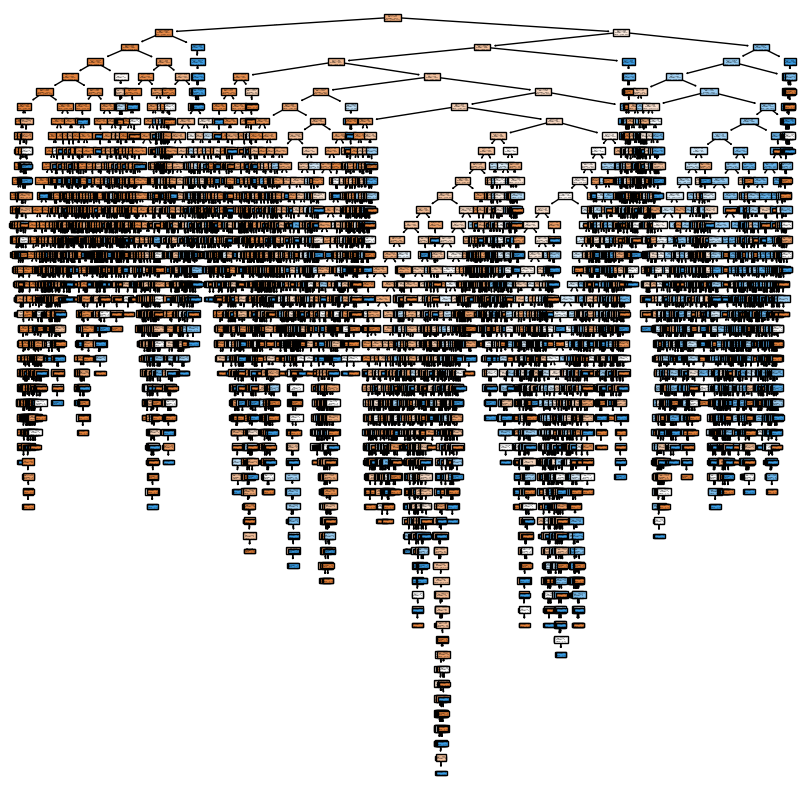

In [111]:
# Plot the tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf, filled=True);

# It takes some time until the whole tree is drawn.
# The tree is very complicated -- indicating a high prob of overfitted.

In [113]:
# Test the model
# Get prediction based on test input
test_pred=clf.predict(test_input)

In [114]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87     11360
           1       0.60      0.62      0.61      3700

    accuracy                           0.80     15060
   macro avg       0.74      0.74      0.74     15060
weighted avg       0.81      0.80      0.81     15060



In [115]:
# Create the tree with pruning

clf=tree.DecisionTreeClassifier(ccp_alpha=0.001)

In [116]:
# Train the tree
clf.fit(train_input, train_target)

DecisionTreeClassifier(ccp_alpha=0.001)

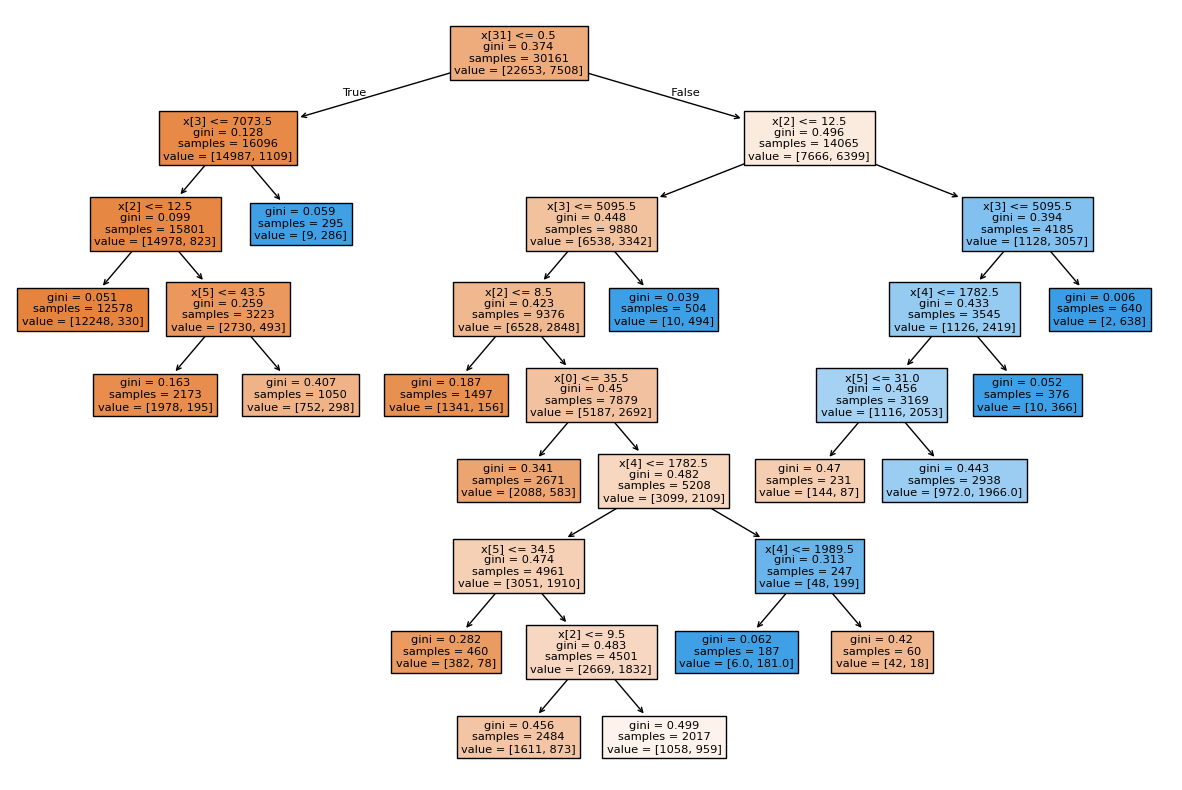

In [117]:
# Plot the tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True);

# This time, the tree looks much more manageable

In [118]:
# Test the model
test_pred=clf.predict(test_input)


In [119]:
# Print metrics
print(classification_report(test_target, test_pred))


              precision    recall  f1-score   support

           0       0.86      0.96      0.90     11360
           1       0.79      0.51      0.62      3700

    accuracy                           0.85     15060
   macro avg       0.82      0.73      0.76     15060
weighted avg       0.84      0.85      0.83     15060



#### $\color{purple}{\text{Part 3: Random Forest - Census Data}}$

In [120]:
# Initialize the model as a random forest classifier
clf=RandomForestClassifier(random_state=42)

In [121]:
# Train the model
clf.fit(train_input, train_target)

RandomForestClassifier(random_state=42)

In [122]:
# Test the model
test_pred=clf.predict(test_input)

In [123]:
# print the metrics
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11360
           1       0.72      0.62      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060



In [124]:
# Creating and training the model
# Initialize the model as a random forest classifier with 150 trees (default is 100 trees)
clf=RandomForestClassifier(n_estimators=150, random_state=42)

In [125]:
# Train the model
clf.fit(train_input, train_target)

RandomForestClassifier(n_estimators=150, random_state=42)

In [126]:
# Test the model
test_pred=clf.predict(test_input)

In [127]:
print(classification_report(test_target, test_pred))

# Results basically same as before, so the additional trees did not help at all.

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11360
           1       0.72      0.62      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060



In [142]:
# Create and Train model
# Initialize ...with pruning
clf=RandomForestClassifier(ccp_alpha=0.0001)

In [143]:
# Train the model
clf.fit(train_input, train_target)

RandomForestClassifier(ccp_alpha=0.0001)

In [144]:
# Test the model
test_pred=clf.predict(test_input)

In [145]:
# Print metrics
print(classification_report(test_target, test_pred))

# Slight increase, but insignificant. (This is the limit of the performance on this dataset)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11360
           1       0.77      0.62      0.68      3700

    accuracy                           0.86     15060
   macro avg       0.83      0.78      0.80     15060
weighted avg       0.85      0.86      0.85     15060



## $\color{orange}{\text{Support Vector Machines}}$

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

#### $\color{orange}{\text{Part 1: Load and preprocess}}$

In [4]:
from google.colab import files
uploaded = files.upload()

mushroom_data=pd.read_csv("mushrooms-full-dataset.csv", dtype=str)

Saving mushrooms-full-dataset.csv to mushrooms-full-dataset (1).csv


In [5]:
mushroom_data['poisonous'].value_counts()

,count
poisonous,
e,4208
p,3916


In [6]:
mushroom_data.isnull().sum()

,0
poisonous,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [7]:
# Preprocessing

# Define inputs and target
target=mushroom_data['poisonous']
inputs=mushroom_data.drop(['poisonous'],axis=1)

In [8]:
# Create a training and a testing dataset

x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42, stratify=target)

In [9]:
# Check results from the stratification

y_train.value_counts(normalize=True)

,proportion
poisonous,
e,0.517926
p,0.482074


In [10]:
pd.Series(y_test).value_counts(normalize=True)

,proportion
poisonous,
e,0.518154
p,0.481846


In [11]:
# Define a seperate encoder for the target and the inputs

enc_i=OrdinalEncoder() # Ordinal encoding transforms categorical data into numerical
enc_t=LabelEncoder() #Label encoder also transfer to numerical for ML.

# OrdinalEncoder works with features (which can be multiple columns).
# LabelEncoder works with target labels (typically a single column).
# Together, they prepare both the inputs and the outputs of the dataset in a format suitable
# for machine learning algorithms, like SVMs, which can only work with numerical data.

In [13]:
# Apply fit_transform() method on the training data and the transform() on the test data.

x_train_transf=enc_i.fit_transform(x_train)
x_test_transf=enc_i.transform(x_test)

y_train_transf=enc_t.fit_transform(y_train)
y_test_transf=enc_t.transform(y_test)

In [14]:
x_train_transf

array([[2., 3., 9., ..., 1., 5., 1.],
       [5., 2., 5., ..., 7., 1., 6.],
       [0., 2., 3., ..., 7., 3., 1.],
       ...,
       [2., 0., 8., ..., 2., 0., 1.],
       [5., 0., 3., ..., 3., 5., 0.],
       [2., 0., 4., ..., 3., 4., 0.]])

In [15]:
y_train_transf

array([1, 0, 0, ..., 0, 0, 0])

#### $\color{orange}{\text{Part 2: Rescaling}}$

In [18]:
# In order for the SVC work correctly, input needs to be rescaled to the range (-1,1)
scaling=MinMaxScaler(feature_range=(-1,1)).fit(x_train_transf)
x_train_rescaled=scaling.transform(x_train_transf)


#### $\color{orange}{\text{Part 3: Classification }}$

In [19]:
C=1.0
svc=svm.SVC(kernel='linear',C=C).fit(x_train_rescaled,y_train_transf)


In [22]:
# Evaluate the model on the test data
y_pred_test=svc.predict(scaling.transform(x_test_transf))

In [20]:
enc_t.classes_

array(['e', 'p'], dtype=object)

#### $\color{orange}{\text{Part 4: Model Evaluation }}$

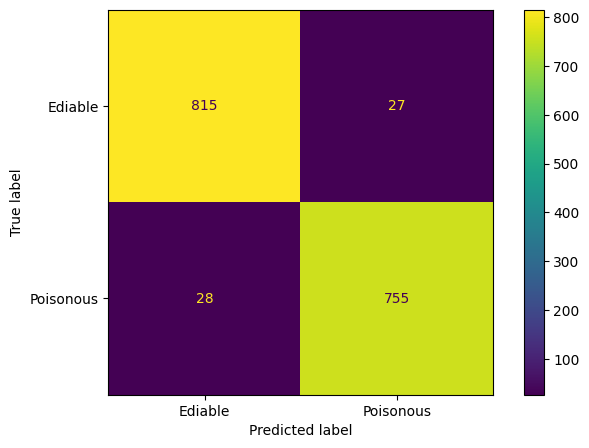

In [25]:
fig, ax=plt.subplots(figsize=(8,5))
cmp=ConfusionMatrixDisplay(confusion_matrix(y_test_transf,y_pred_test),
                           display_labels=['Ediable','Poisonous'])

cmp.plot(ax=ax);


In [26]:
print(classification_report(y_test_transf,y_pred_test, target_names=['Ediable','Poisonous']))

              precision    recall  f1-score   support

     Ediable       0.97      0.97      0.97       842
   Poisonous       0.97      0.96      0.96       783

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



#### $\color{orange}{\text{Part 5: Hyperparameter Tuning with GridSearchCV }}$

In [28]:
# Choose the best kernel and optimal C parameter based on Cross Validation of the training data

tuned_parameters=[
    {'kernel':['linear'], 'C':[1,10]},
    {'kernel':['poly'], 'C':[1,10]},
    {'kernel':['rbf'], 'gamma':[1e-3,1e-4], 'C':[1,10]}
]

In [31]:
scores=['precision','recall']

In [32]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(x_train_rescaled, y_train_transf)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test_transf, clf.predict(scaling.transform(x_test_transf))
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision



/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters set found on development set:

{'C': 10, 'kernel': 'poly'}

Grid scores on development set:

0.951 (+/-0.012) for {'C': 1, 'kernel': 'linear'}
0.959 (+/-0.008) for {'C': 10, 'kernel': 'linear'}
1.000 (+/-0.001) for {'C': 1, 'kernel': 'poly'}
1.000 (+/-0.000) for {'C': 10, 'kernel': 'poly'}
0.926 (+/-0.010) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.895 (+/-0.011) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.947 (+/-0.007) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.926 (+/-0.010) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00     

## $\color{red}{\text{Linear, Ridge, and Lasso Regression}}$

In [67]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import mean_squared_error

#### $\color{red}{\text{Part 1: Load the data}}$

In [39]:
from google.colab import files
uploaded = files.upload()

data=pd.read_csv("Hitters.csv", dtype=str)
df_hitters=data.copy()
df_hitters.head()

Saving Hitters.csv to Hitters (4).csv


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [40]:
# Categorical variables
print("the league type are: ", df_hitters['League'].unique())
print("the division type are: ", df_hitters['Division'].unique())
print("the new league type are: ", df_hitters['NewLeague'].unique())

the league type are:  ['A' 'N']
the division type are:  ['E' 'W']
the new league type are:  ['A' 'N']


In [41]:
df_hitter_num=pd.get_dummies(df_hitters, columns=['League','Division','NewLeague'], drop_first=True)
df_hitter_num.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,False,False,False
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475,True,True,True
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480,False,True,False
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500,True,False,True
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,True,False,True


In [42]:
# Check if there are NaN values
df_hitter_num.isnull().sum() # So salary has 59 NaN values

,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0
CHmRun,0


In [43]:
df_hitters_num_notnull=df_hitter_num.dropna() # Drop NaN for now (these 59 salary rows)
df_hitters_num_notnull.isnull().sum()

,0
AtBat,0
Hits,0
HmRun,0
Runs,0
RBI,0
Walks,0
Years,0
CAtBat,0
CHits,0
CHmRun,0


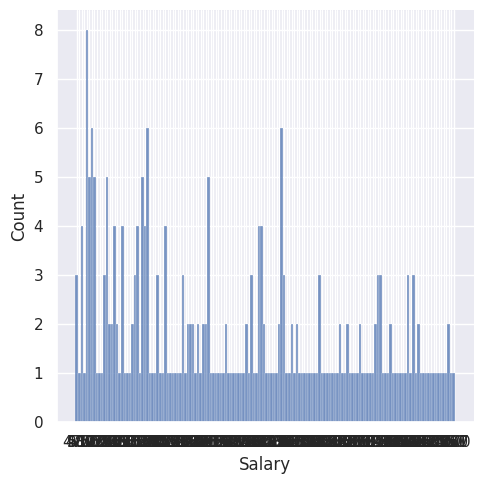

In [44]:
# Check distribution
sns.displot(df_hitters_num_notnull['Salary']);

In [45]:
# Check the correlation between the dependent and independent variables
correlation=df_hitters_num_notnull.corr()
correlation['Salary'].sort_values(ascending=True)

,Salary
Division_W,-0.192514
League_N,-0.014282
Errors,-0.005401
NewLeague_N,-0.002834
Assists,0.025436
PutOuts,0.300480
HmRun,0.343028
AtBat,0.394771
Years,0.400657
Runs,0.419859


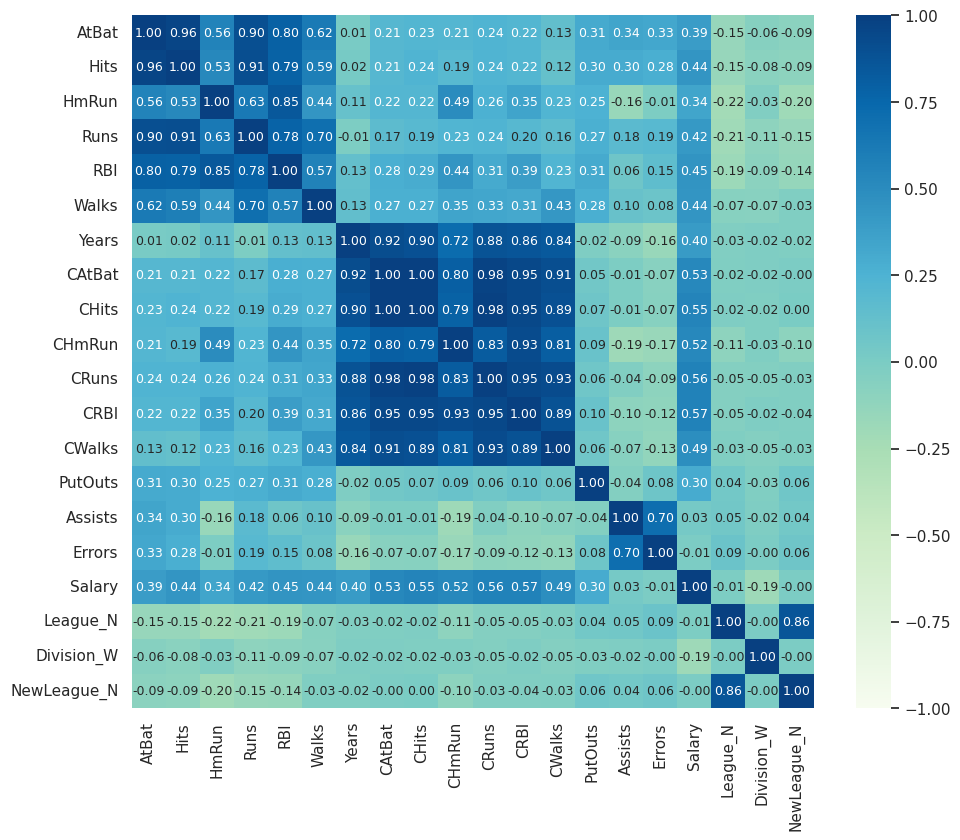

In [51]:
# Check for multicollinearity
plt.figure(figsize=(11,9))
sns.heatmap(df_hitters_num_notnull.corr(),
            vmin=-1,
            vmax=1,
            cmap='GnBu',
            annot=True,
            fmt='.2f',
            annot_kws={'size':9});

#### $\color{red}{\text{Part 2: Declare the dependent and independent variables }}$

In [52]:
X=df_hitters_num_notnull.drop(['Salary'], axis=1)
y=df_hitters_num_notnull['Salary']

#### $\color{red}{\text{Part 3: Split the data into training and testing parts }}$

In [53]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.35, random_state=42)

In [54]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#### $\color{red}{\text{Part 4: Perform linear regression}}$

In [55]:
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [56]:
print('Linear Regression coefficient are: ', lin_reg.coef_)
print('Linear Regression y-intercept is: ', lin_reg.intercept_)

Linear Regression coefficient are:  [-186.42862719  367.44619958  115.65964334  -94.13165836 -123.92050226
   91.23056643  104.10665696 -790.43623478  236.13790729   23.99874624
  654.32161638  200.07678162 -208.45615      81.95535442   43.22930852
   -2.4606235    47.62944137  -46.98418609   -2.78980798]
Linear Regression y-intercept is:  525.7229705882351


In [57]:
lin_reg_y_pred=lin_reg.predict(X_test)
lin_reg_y_pred

array([6.42809231e+02, 7.53837716e+02, 8.40670971e+02, 3.77487737e+02,
       3.31778432e+02, 3.13493039e+02, 6.97675980e+02, 4.79176836e+02,
       8.94177464e+02, 6.69192991e+02, 6.78257241e+02, 8.12173262e+02,
       2.72308224e+01, 5.12986745e+02, 2.08482188e+02, 4.26494575e+02,
       8.26631220e+02, 3.34735226e+01, 1.16385740e+03, 2.68732678e+02,
       4.18510163e+02, 7.80630791e+02, 5.58980942e+02, 6.71287186e+02,
       5.87659940e+02, 1.87884387e+02, 8.51528602e+02, 2.59474813e+02,
       4.56026849e+02, 1.13137980e+02, 1.65999095e+02, 1.38929028e+02,
       3.12513134e+02, 4.93616838e+02, 2.41848917e+02, 1.56771288e+02,
       1.29271999e+03, 2.07647581e+02, 1.70478190e+02, 2.19449007e+02,
       4.55852946e+00, 3.16064577e+02, 5.56668251e+02, 4.28360537e+02,
       6.26118096e+02, 7.49985746e+02, 2.30489003e+02, 2.03861112e+02,
       2.73344434e+02, 6.27591191e+02, 8.50525885e+02, 2.93678487e+02,
       7.21441128e+02, 1.89841586e+02, 3.14176818e+02, 5.48867265e+02,
      

In [63]:
lin_comp=pd.DataFrame({'Predicted': lin_reg_y_pred, 'Actual': y_test})
lin_comp

,Predicted,Actual
148,642.809231,850
154,753.837716,277.5
318,840.670971,875
279,377.487737,150
88,331.778432,260
...,...,...
288,465.976527,326.667
311,341.375136,525
212,1.264295,68
35,825.569159,850


In [64]:
print('Linear Regression Model RMSE is: ', math.sqrt(mean_squared_error(y_test, lin_reg_y_pred)))
print('Linear Regression Model Training Score: ', lin_reg.score(X_train, y_train))
print('Linear Regression Model Testing Score: ', lin_reg.score(X_test, y_test))


Linear Regression Model RMSE is:  389.2708628821164
Linear Regression Model Training Score:  0.6350845564454657
Linear Regression Model Testing Score:  0.33849372719565507


#### $\color{red}{\text{Part 5: Perform ridge regression}}$

In [65]:
cv=RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

In [68]:
# Initializing the ridge regressor
ridge=RidgeCV(alphas=np.arange(0.1, 10, 0.1), cv=cv, scoring='neg_mean_absolute_error')

In [70]:
# Fitting the ridge regressor
ridge.fit(X_train, y_train)
ridge_reg_y_pred=ridge.predict(X_test)

print('Ridge tuning parameter: ', ridge.alpha_)
print('Ridge model coefficients: ', ridge.coef_)
print('Ridge model intercept: ', ridge.intercept_)

Ridge tuning parameter:  9.9
Ridge model coefficients:  [-45.77033229 157.431153    48.63302268  14.96381827 -40.79989402
  36.89828833  21.03610077 -19.42103879  64.91511007  50.24061096
 105.95920646  45.95223127 -50.21445597  79.54345337  14.81676719
 -19.50975851  24.43880898 -51.04221393   9.8832213 ]
Ridge model intercept:  525.7229705882353


In [71]:
print("Ridge Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, ridge_reg_y_pred)))
print("Ridge Regression Model Training Score: ",ridge.score(X_train, y_train))
print("Ridge Regression Model Testing Score: ",ridge.score(X_test, y_test))

Ridge Regression Model RMSE is:  387.46228918009615
Ridge Regression Model Training Score:  0.5896535922011126
Ridge Regression Model Testing Score:  0.34462623662536285


#### $\color{red}{\text{Part 6: Perform lasso regression}}$

In [72]:
# Initializing the lasso regressor
lasso=LassoCV(alphas=np.arange(0.1, 10, 0.1), cv=cv, tol=1)

In [73]:
# Fitting the lasso regressor
lasso.fit(X_train, y_train)
lasso_reg_y_pred=lasso.predict(X_test)

print('Lasso tuning parameter: ', lasso.alpha_)
print('Lasso model coefficients: ', lasso.coef_)
print('Lasso model intercept: ', lasso.intercept_)

Lasso tuning parameter:  8.1
Lasso model coefficients:  [134.75868683  45.4322288   35.02548263  -0.         -11.97662408
  24.77771939 154.42664589  31.97171631  15.89994852  14.95363543
   0.           0.          -0.          68.62125201 -12.45490437
 -16.98032512  24.20471806 -50.91408824   4.49962281]
Lasso model intercept:  525.7229705882353


In [74]:
print("Lasso Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lasso_reg_y_pred)))
print("Lasso Regression Model Training Score: ",lasso.score(X_train, y_train))
print("Lasso Regression Model Testing Score: ",lasso.score(X_test, y_test))

Lasso Regression Model RMSE is:  424.85496848102923
Lasso Regression Model Training Score:  0.5311559311730005
Lasso Regression Model Testing Score:  0.2120265688516646


#### $\color{red}{\text{Part 7: Compare the score}}$

In [76]:
print("Linear Regression Model Training Score: ",lin_reg.score(X_train, y_train))
print("Linear Regression Model Testing Score: ",lin_reg.score(X_test, y_test))
print('----')
print("Ridge Regression Model Training Score: ",ridge.score(X_train, y_train))
print("Ridge Regression Model Testing Score: ",ridge.score(X_test, y_test))
print('----')
print("Lasso Regression Model Training Score: ",lasso.score(X_train, y_train))
print("Lasso Regression Model Testing Score: ",lasso.score(X_test, y_test))

Linear Regression Model Training Score:  0.6350845564454657
Linear Regression Model Testing Score:  0.33849372719565507
----
Ridge Regression Model Training Score:  0.5896535922011126
Ridge Regression Model Testing Score:  0.34462623662536285
----
Lasso Regression Model Training Score:  0.5311559311730005
Lasso Regression Model Testing Score:  0.2120265688516646


#### $\color{red}{\text{Part 8: Root mean squared error}}$

In [77]:
print("Linear Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lin_reg_y_pred)))
print("Ridge Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, ridge_reg_y_pred)))
print("Lasso Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lasso_reg_y_pred)))

Linear Regression Model RMSE is:  389.2708628821164
Ridge Regression Model RMSE is:  387.46228918009615
Lasso Regression Model RMSE is:  424.85496848102923


#### $\color{red}{\text{Part 9: Replace missing value in the DataFrame (via ridge predict)}}$

In [78]:
df_hitters_nan=df_hitter_num[df_hitter_num['Salary'].isnull()]
df_hitters_nan.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,False,False,False
15,183,39,3,20,15,11,3,201,42,3,20,16,11,118,0,0,NaN,False,True,False
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,912,88,9,NaN,False,True,False
22,22,10,1,4,2,1,6,84,26,2,9,9,3,812,84,11,NaN,False,True,False
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,127,221,7,NaN,False,True,False


In [79]:
X_nan=df_hitters_nan.drop(['Salary'], axis=1)
y_nan=df_hitters_nan['Salary']

In [80]:
scaler=StandardScaler()
X_nan=scaler.fit_transform(X_nan)

In [81]:
nan_pred=ridge.predict(X_nan)
nan_pred

array([ 248.55728423,   94.78288898,  919.03975174,  183.18754624,
        835.07844377, 1312.2217733 ,  207.86292325,  845.73735632,
        243.18449144,  619.18364984,  430.97281786,  511.12053531,
       1301.719867  ,   57.6773841 ,  563.85394218,  -31.51447844,
        338.472967  ,  760.99239411,  351.58653371,  412.62637934,
       1163.48365876,  208.28204323,  423.90179375,  724.64864981,
        605.60590453,  785.73258042, 1116.87513787,  217.8488922 ,
        469.11816555, 1046.88689457,  661.74183257,  389.31483461,
        388.96172914,  304.28390284,  537.5174394 ,  674.32150214,
        264.84150961,  433.4296799 ,  303.40630353,  202.78652525,
        208.26439349,  749.95492908,  355.58295851,  456.76628979,
        423.4389553 ,  539.70176773,  612.93110626, 1083.50964479,
        845.42169776,  -16.57538984,  201.92682492,  380.8241988 ,
        324.40297391,   65.76813669,  753.71504119,  213.67563291,
       1115.353327  , 1153.85422187,  419.80512361])

In [83]:
df_nan_full=df_hitters_nan.copy()
df_nan_full['Salary']=nan_pred
df_nan_full.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,248.557284,False,False,False
15,183,39,3,20,15,11,3,201,42,3,20,16,11,118,0,0,94.782889,False,True,False
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,912,88,9,919.039752,False,True,False
22,22,10,1,4,2,1,6,84,26,2,9,9,3,812,84,11,183.187546,False,True,False
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,127,221,7,835.078444,False,True,False
